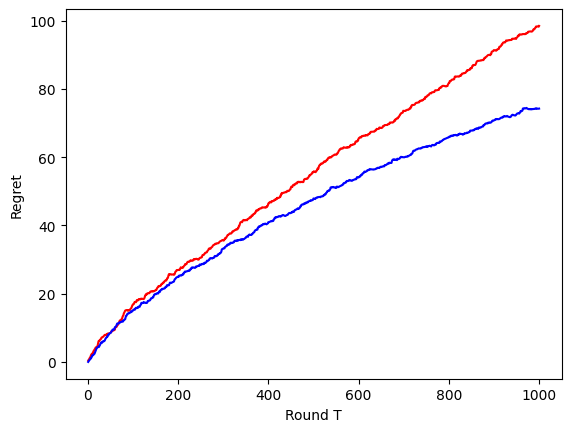

In [1]:
# import modules 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import random
k = 10    #number of arms
T = 1000  #horizon  
N = 20    #explore rounds
bandit = np.random.random((k,)) #success prob. for each arm
best = np.amax(bandit) #best arm
#print('best arm = %d' %np.argmax(bandit))

regret_eg =  np.zeros((T,)) #regret_eg for round t


#bandit reward distribution
a = np.random.uniform(0,1,(k,));
b = np.zeros((k,));
for i in range(k):
    b[i]=np.random.uniform(a[i],1)
    
mean = (a+b)/2
best_arm = np.argmax(mean)

#this code implements e-greedy algorithm
epsilon = 1; 
t = 0;
bandit_scores_eg = np.zeros((k,T)) #total score of each arm for T rounds
inst_score_eg = np.zeros((T,)) #reward for round t
alg_score_eg = np.zeros((T,)) #cumulative reward for round t
regret_eg =  np.zeros((T,)) #regret_eg for round t
T_regret_eg = 0 #regret_eg after t rounds
mu_estimate_eg = np.zeros((k,)) #estimate of each arm 
cum_score_eg = 0 #cumulative score


for t in range(T):
    chance = np.random.uniform(0,1);
    if chance < epsilon :
        bandit_i  = np.random.randint(0,high=k-1)
    else :
        bandit_i = np.argmax(mu_estimate_eg) 
        
    score = np.random.uniform(a[bandit_i], b[bandit_i])
    inst_score_eg[t] = score
    alg_score_eg[t] = cum_score_eg + score
    cum_score_eg += score
    regret_eg[t] = (t+1)*mean[best_arm] - cum_score_eg
    bandit_scores_eg[bandit_i,t] = score
    mu_estimate_eg[bandit_i] = np.sum(bandit_scores_eg[bandit_i])/np.count_nonzero(bandit_scores_eg[bandit_i])
    
    epsilon = ((t+1)**(-1/3))*((k*np.log(t+1))**(1/3))
    
    
T_regret_eg = T*mean[best_arm] - np.sum(inst_score_eg)


#this code implements UCB algorithm
t = 0;
bandit_scores_ucb = np.zeros((k,T)) #total score of each arm for T rounds
inst_score_ucb = np.zeros((T,)) #reward for round t
alg_score_ucb = np.zeros((T,)) #cumulative reward for round t
regret_ucb =  np.zeros((T,)) #regret_eg for round t
T_regret_ucb = 0 #regret_eg after t rounds
mu_estimate_ucb = np.zeros((k,)) #estimate of each arm
q_estimate = np.zeros((k,))
X = np.zeros((k,))
cum_score_ucb = 0 #cumulative score
ucb = np.zeros((k,)) + np.Inf

chosen_bandits = np.zeros((T,))
for t in range(T):
    
    bandit_i = np.argmax(ucb)
    chosen_bandits[t] = bandit_i
    
    score = np.random.uniform(a[bandit_i], b[bandit_i])
    inst_score_ucb[t] = score
    alg_score_ucb[t] = cum_score_ucb + score
    cum_score_ucb += score
    regret_ucb[t] = (t+1)*mean[best_arm] - cum_score_ucb
    bandit_scores_ucb[bandit_i,t] = score
    
    X[bandit_i] = np.count_nonzero(bandit_scores_ucb[bandit_i])
    q_estimate[bandit_i] = np.sum(X[bandit_i])
    mu_estimate_ucb[bandit_i] = np.sum(bandit_scores_ucb[bandit_i])/q_estimate[bandit_i]
    ucb[bandit_i] = mu_estimate_ucb[bandit_i] + np.sqrt(np.log(T)/q_estimate[bandit_i])
    
    
T_regret_ucb = T*mean[best_arm] - np.sum(inst_score_eg)


"""
plt.plot(np.arange(1,T+1),alg_score_eg)
plt.plot(np.arange(1,T+1),alg_score_ucb)
plt.xlabel("Round T")
plt.ylabel("Total score") 
plt.show()
"""

plt.plot(np.arange(1,T+1),regret_eg,'r')
plt.plot(np.arange(1,T+1),regret_ucb,'b')
plt.xlabel("Round T")
plt.ylabel("Regret") 
plt.show()